In [1]:
import warnings
warnings.filterwarnings("ignore")

### Loading the Data

In [2]:
import pandas as pd
pd.set_option("display.max_columns",None)

In [3]:
WASTE_GENERATION_df = pd.read_csv("C:/Users/hp/Desktop/Projects/Business-Sustainability-through-Environmental-Impact-Analysis/Data/Waste Generation/municipal waste.csv")
WASTE_GENERATION_df.head()

,region,province,name,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,wden,urb,fee,d_fee,sample,organic,paper,glass,wood,metal,plastic,raee,texile,other,msw_so,msw_un,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
0,Emilia_Romagna,Ferrara,Comacchio,502.250000,129.270004,66.419998,38006,283.750000,22648,1.0,0.0,1.0,79.816742,119671.476562,2.0,PAYT,1,1,NaN,4.363508,3.592508,2.269844,0.462317,1.131815,0.346470,0.112243,3.199499,20396261.0,13560520,33956781,60.07,3.0,285.0,33.105049,15.233530,7.269942,4.354818,9.438692,7.488041
1,Emilia_Romagna,Ferrara,Lagosanto,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,0.0,1.0,143.786301,70030.984375,3.0,PAYT,1,1,35.040904,9.887817,9.518352,4.001796,1.860965,4.643623,1.608505,0.351429,9.019776,1831407.0,580460,2411867,75.93,3.0,11.0,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284
2,Emilia_Romagna,Ferrara,Goro,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,0.0,1.0,146.318558,81116.523438,3.0,PAYT,1,1,37.377010,11.991079,6.653014,0.000013,0.744725,5.224834,NaN,0.449308,16.040081,1694922.0,464400,2159322,78.49,3.0,49.0,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891
3,Emilia_Romagna,Ferrara,Mesola,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,0.0,1.0,84.697502,43320.460938,3.0,PAYT,1,1,45.310474,9.762878,7.551381,0.148580,0.746540,5.202531,NaN,0.400064,9.769176,2881055.0,770860,3651915,78.89,3.0,165.0,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,0.0,1.0,341.540619,201565.265625,2.0,STANDARD,0,0,0.428440,6.601569,4.334883,2.296731,0.103101,5.120555,0.275157,0.287387,4.052555,3026700.0,4169180,7195880,42.06,1.0,60.0,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867


In [4]:
categorical_columns = ["region","province","name","istat","alt","isle","sea","urb","fee","d_fee","sample","geo","s_wteregio","s_landfill"]

categorical_df = WASTE_GENERATION_df[categorical_columns]
categorical_df.head()

,region,province,name,istat,alt,isle,sea,urb,fee,d_fee,sample,geo,s_wteregio,s_landfill
0,Emilia_Romagna,Ferrara,Comacchio,38006,1.0,0.0,1.0,2.0,PAYT,1,1,3.0,33.105049,15.233530
1,Emilia_Romagna,Ferrara,Lagosanto,38011,1.0,0.0,1.0,3.0,PAYT,1,1,3.0,33.105049,15.233530
2,Emilia_Romagna,Ferrara,Goro,38025,1.0,0.0,1.0,3.0,PAYT,1,1,3.0,33.105049,15.233530
3,Emilia_Romagna,Ferrara,Mesola,38014,1.0,0.0,1.0,3.0,PAYT,1,1,3.0,33.105049,15.233530
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,110005,1.0,0.0,1.0,2.0,STANDARD,0,0,1.0,4.046452,45.411903


In [20]:
categorical_df.isnull().mean()*100

region        0.000000
province      0.000000
name          0.138217
istat         0.000000
alt           0.138217
isle          0.138217
sea           0.138217
urb           0.138217
fee           0.000000
d_fee         0.000000
sample        0.000000
geo           6.565308
s_wteregio    6.565308
s_landfill    6.565308
dtype: float64

<Axes: >

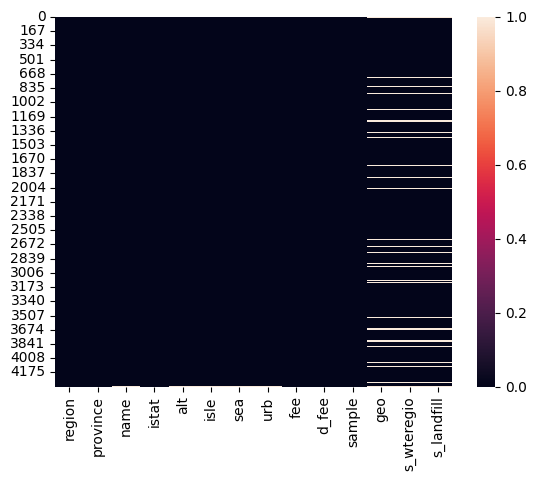

In [19]:
import seaborn as sns
sns.heatmap(categorical_df.isnull())

In [5]:
numerical_df = WASTE_GENERATION_df.drop(categorical_columns,axis=1)
numerical_df.head()

,tc,cres,csor,area,pop,pden,wden,organic,paper,glass,wood,metal,plastic,raee,texile,other,msw_so,msw_un,msw,sor,roads,gdp,proads,wage,finance
0,502.250000,129.270004,66.419998,283.750000,22648,79.816742,119671.476562,NaN,4.363508,3.592508,2.269844,0.462317,1.131815,0.346470,0.112243,3.199499,20396261.0,13560520,33956781,60.07,285.0,7.269942,4.354818,9.438692,7.488041
1,228.050003,49.520000,44.139999,34.439999,4952,143.786301,70030.984375,35.040904,9.887817,9.518352,4.001796,1.860965,4.643623,1.608505,0.351429,9.019776,1831407.0,580460,2411867,75.93,11.0,7.109984,6.082588,9.510139,7.323284
2,268.010010,50.610001,44.599998,26.620001,3895,146.318558,81116.523438,37.377010,11.991079,6.653014,0.000013,0.744725,5.224834,NaN,0.449308,16.040081,1694922.0,464400,2159322,78.49,49.0,7.267856,4.335555,8.891356,7.485891
3,199.089996,41.110001,40.439999,84.300003,7140,84.697502,43320.460938,45.310474,9.762878,7.551381,0.148580,0.746540,5.202531,NaN,0.400064,9.769176,2881055.0,770860,3651915,78.89,165.0,7.085936,3.710479,9.433685,7.298514
4,233.639999,58.270000,25.950001,35.700001,12193,341.540619,201565.265625,0.428440,6.601569,4.334883,2.296731,0.103101,5.120555,0.275157,0.287387,4.052555,3026700.0,4169180,7195880,42.06,60.0,7.247444,5.274037,9.125561,7.464867
